In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
from scipy.stats import f_oneway, kruskal
import scikit_posthocs as spost
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from IPython.display import HTML

In [3]:
pd.reset_option('display.max_rows')

## Preprocessing

In [4]:
data = pd.read_csv('villager_data_final.csv')
data

,name,rank,tier,Name,Species,Gender,Personality,Birthday,Catchphrase
0,Marshal,1,Tier 1,Marshal,Squirrel,Male,Smug (A),September 29,sulky
1,Raymond,2,Tier 1,Raymond,Cat,Male,Smug (B),October 1,crisp
2,Shino,3,Tier 1,Shino,Deer,Female,Peppy (A),October 31,okaaay
3,Stitches,4,Tier 1,Stitches,Bear cub,Male,Lazy (B),February 10,stuffin'
4,Bob,5,Tier 1,Bob,Cat,Male,Lazy (B),January 1,pthhpth
...,...,...,...,...,...,...,...,...,...
408,Greta,409,Tier 6,Greta,Mouse,Female,Snooty (A),September 5,yelp
409,Queenie,410,Tier 6,Queenie,Ostrich,Female,Snooty (B),November 13,chicken
410,Bitty,411,Tier 6,Bitty,Hippo,Female,Snooty (A),October 6,my dear
411,Toby,412,Tier 6,Toby,Rabbit,Male,Smug (A),July 10,ribbit


In [5]:
#Show all the rows with missing values

data[data.isnull().any(axis=1)]

,name,rank,tier,Name,Species,Gender,Personality,Birthday,Catchphrase
88,OHare,89,Tier 4,NaN,NaN,NaN,NaN,NaN,NaN
225,Buck(Brows),226,Tier 5,NaN,NaN,NaN,NaN,NaN,NaN
338,WartJr,339,Tier 6,NaN,NaN,NaN,NaN,NaN,NaN
353,Crackle(Spork),354,Tier 6,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.drop('Name', axis=1, inplace=True)
data.rename(columns={'name': 'Name'}, inplace=True)
data.rename(columns={'rank': 'Rank', 'tier':'Tier'}, inplace=True)

In [7]:
data.iloc[88]= ["O'Hare", 89, 'Tier 4', 'Rabbit', 'Male', 'Smug (B)', 'July 24', 'amigo']
data.iloc[225]= ['Buck', 226, 'Tier 5', 'Horse', 'Male', 'Jock (B)', 'April 4', 'pardner']
data.iloc[338]= ['Wart Jr.', 339, 'Tier 6', 'Frog', 'Male', 'Cranky (B)', 'August 21', 'grr-ribbit']
data.iloc[353]= ['Spork', 354, 'Tier 6', 'Pig', 'Male', 'Lazy (B)', 'September 3', 'snork']

In [8]:
data.to_csv('villager_data_.csv')

## Univariate analysis

In [9]:
data.describe(include='all')

,Name,Rank,Tier,Species,Gender,Personality,Birthday,Catchphrase
count,413,413.000000,413,413,413,413,413,413
unique,413,NaN,6,36,2,16,364,409
top,Marshal,NaN,Tier 6,Cat,Male,Normal (B),August 18,sweetie
freq,1,NaN,163,23,214,40,2,2
mean,NaN,207.000000,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,119.367081,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,207.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,310.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Personality

In [10]:
data['Personality'].describe()

count            413
unique            16
top       Normal (B)
freq              40
Name: Personality, dtype: object

<Axes: xlabel='Personality'>

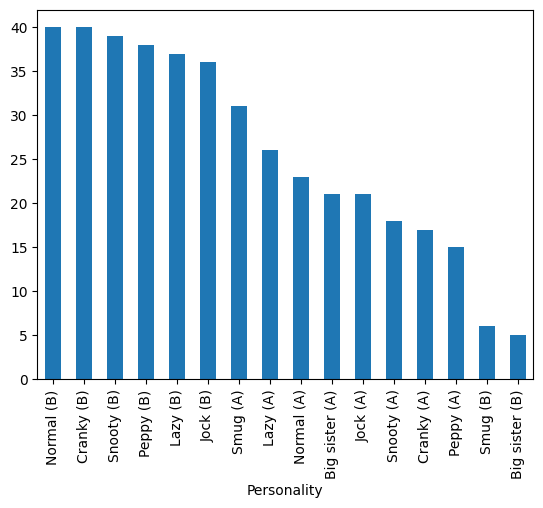

In [11]:
data['Personality'].value_counts().plot(kind='bar') 

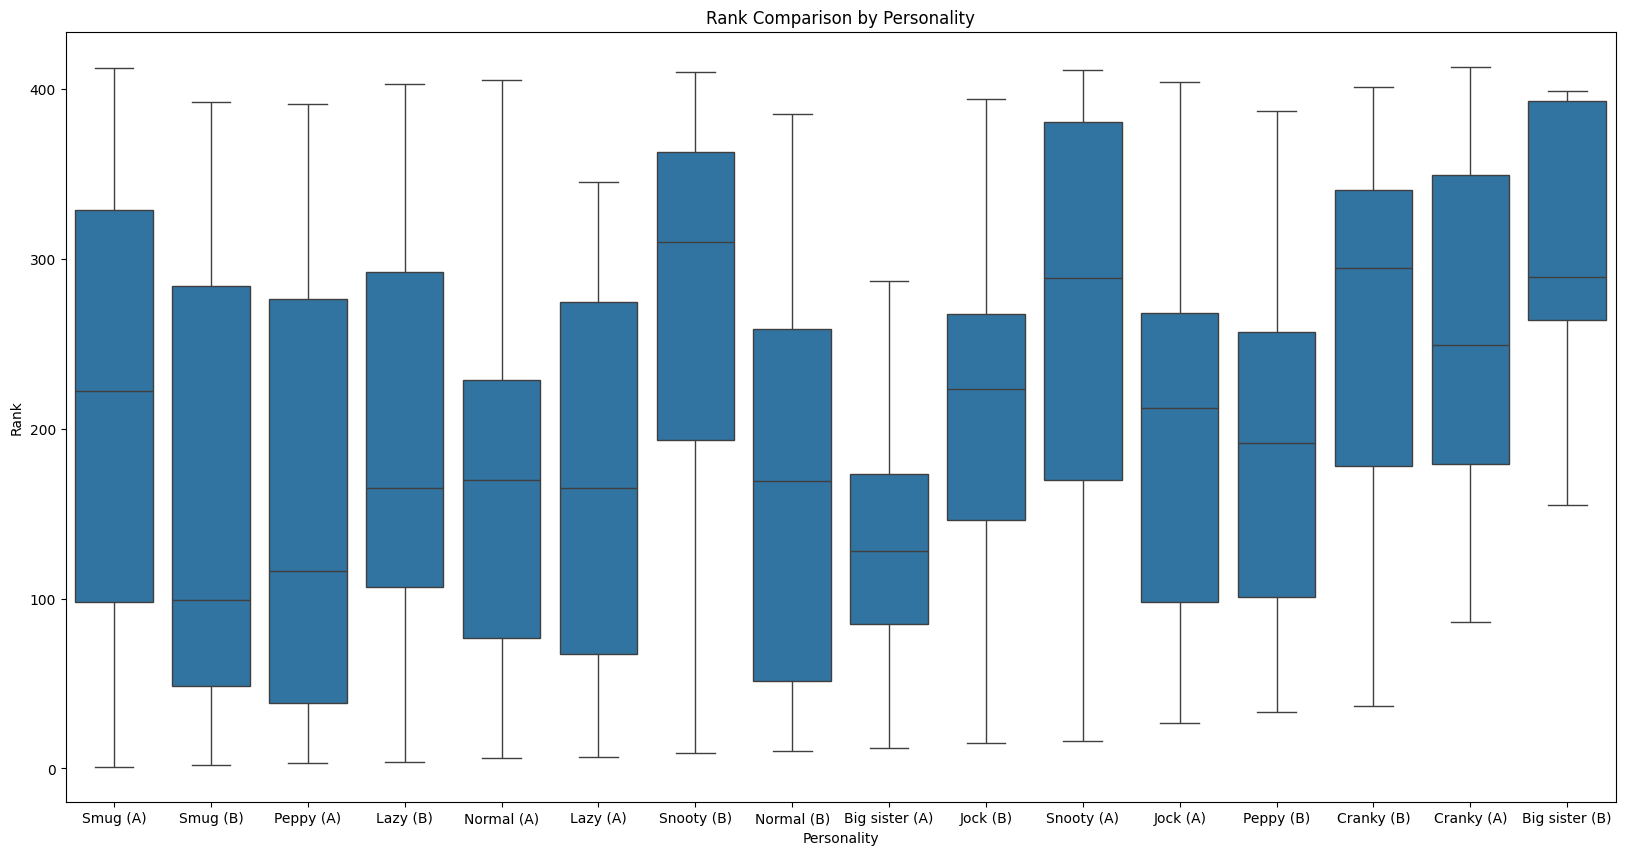

In [12]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x='Personality', y='Rank', data=data)
plt.title("Rank Comparison by Personality")
plt.show()

/var/folders/2r/rd334g7d7gnfkfqkdqsn1x540000gn/T/ipykernel_78149/961340421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Personality', y='Rank', data=data, inner="box", palette='pastel')


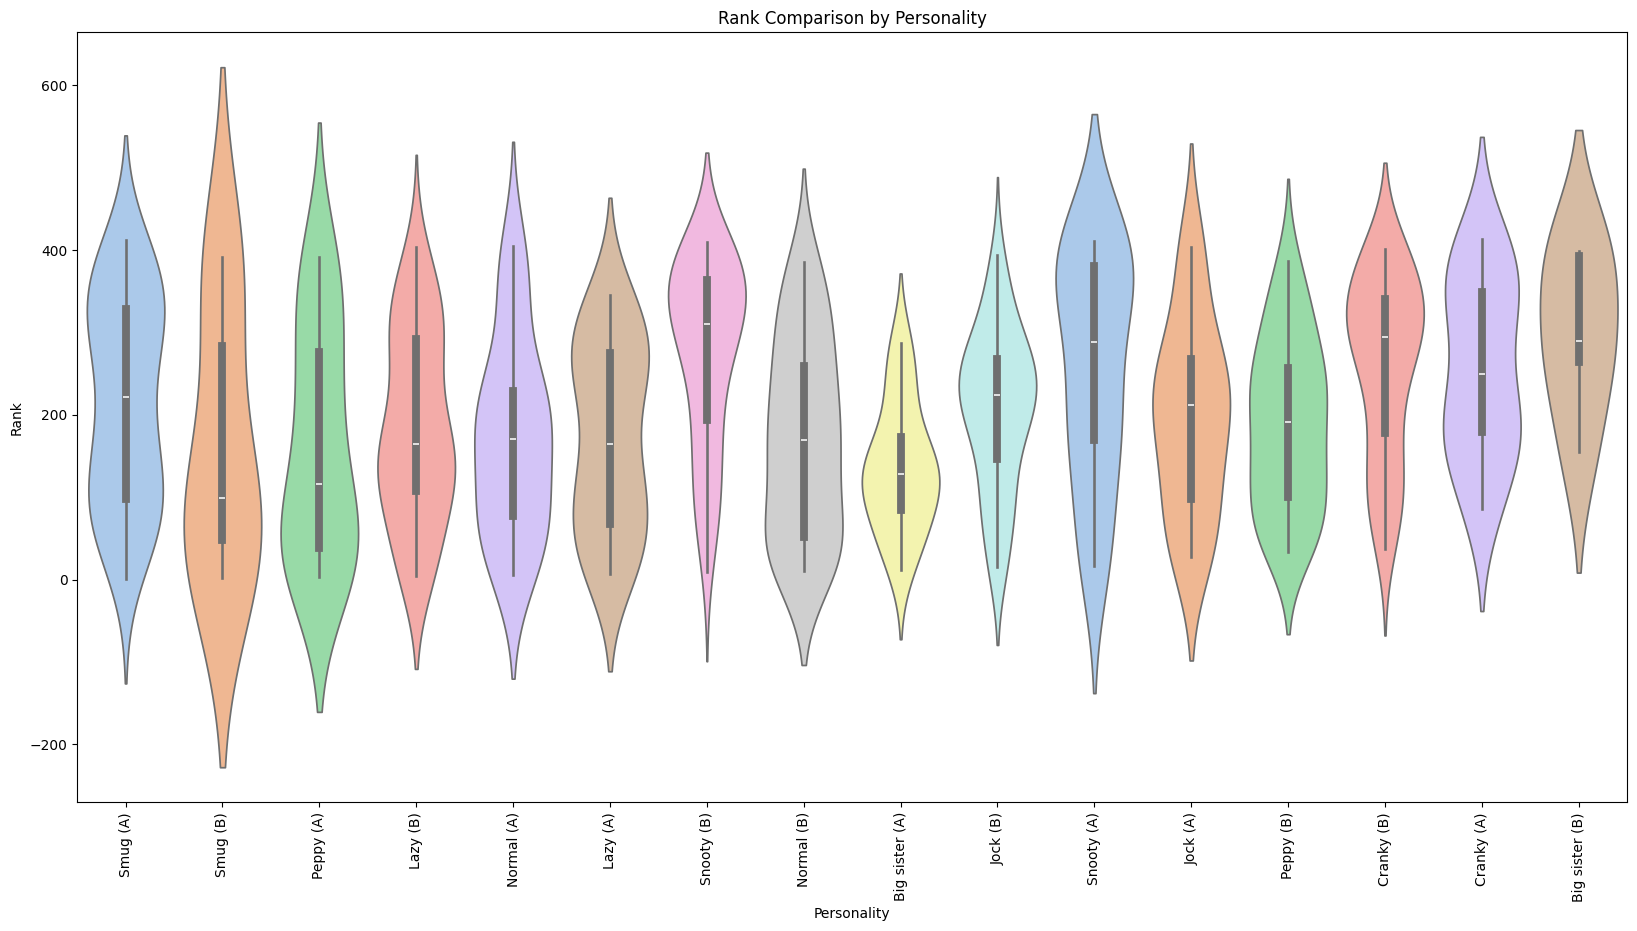

In [13]:
plt.figure(figsize=(20, 10))  # Adjust the figure size for better visibility

ax = sns.violinplot(x='Personality', y='Rank', data=data, inner="box", palette='pastel')  
plt.title("Rank Comparison by Personality")

plt.xticks(rotation=90)  # Rotate x-axis labels for readability if too many species
plt.show()

-- Fun fact --

All lazy, smug, cranky, and jock characters are male, and all peppy, snooty, normal, and big sister characters are female.

In [14]:
for personality in data['Personality'].unique():
    count = data.loc[data['Personality'] == personality, 'Gender'].value_counts()
    print(f' -- {personality} : {count}')

 -- Smug (A) : Gender
Male    31
Name: count, dtype: int64
 -- Smug (B) : Gender
Male    6
Name: count, dtype: int64
 -- Peppy (A) : Gender
Female    15
Name: count, dtype: int64
 -- Lazy (B) : Gender
Male    37
Name: count, dtype: int64
 -- Normal (A) : Gender
Female    23
Name: count, dtype: int64
 -- Lazy (A) : Gender
Male    26
Name: count, dtype: int64
 -- Snooty (B) : Gender
Female    39
Name: count, dtype: int64
 -- Normal (B) : Gender
Female    40
Name: count, dtype: int64
 -- Big sister (A) : Gender
Female    21
Name: count, dtype: int64
 -- Jock (B) : Gender
Male    36
Name: count, dtype: int64
 -- Snooty (A) : Gender
Female    18
Name: count, dtype: int64
 -- Jock (A) : Gender
Male    21
Name: count, dtype: int64
 -- Peppy (B) : Gender
Female    38
Name: count, dtype: int64
 -- Cranky (B) : Gender
Male    40
Name: count, dtype: int64
 -- Cranky (A) : Gender
Male    17
Name: count, dtype: int64
 -- Big sister (B) : Gender
Female    5
Name: count, dtype: int64


### Species

In [15]:
data['Species'].describe()

count     413
unique     36
top       Cat
freq       23
Name: Species, dtype: object

<Axes: xlabel='Species'>

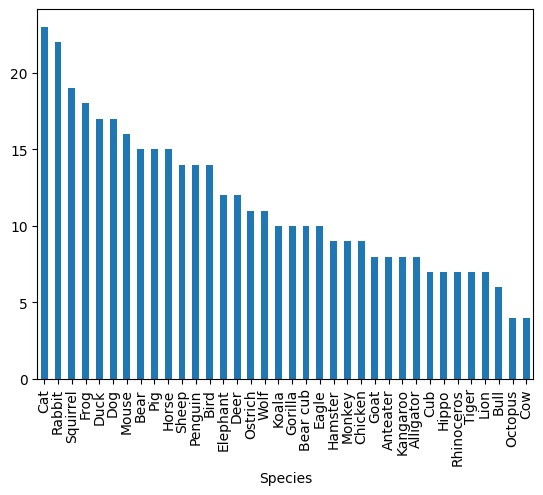

In [16]:
data['Species'].value_counts().plot(kind='bar')

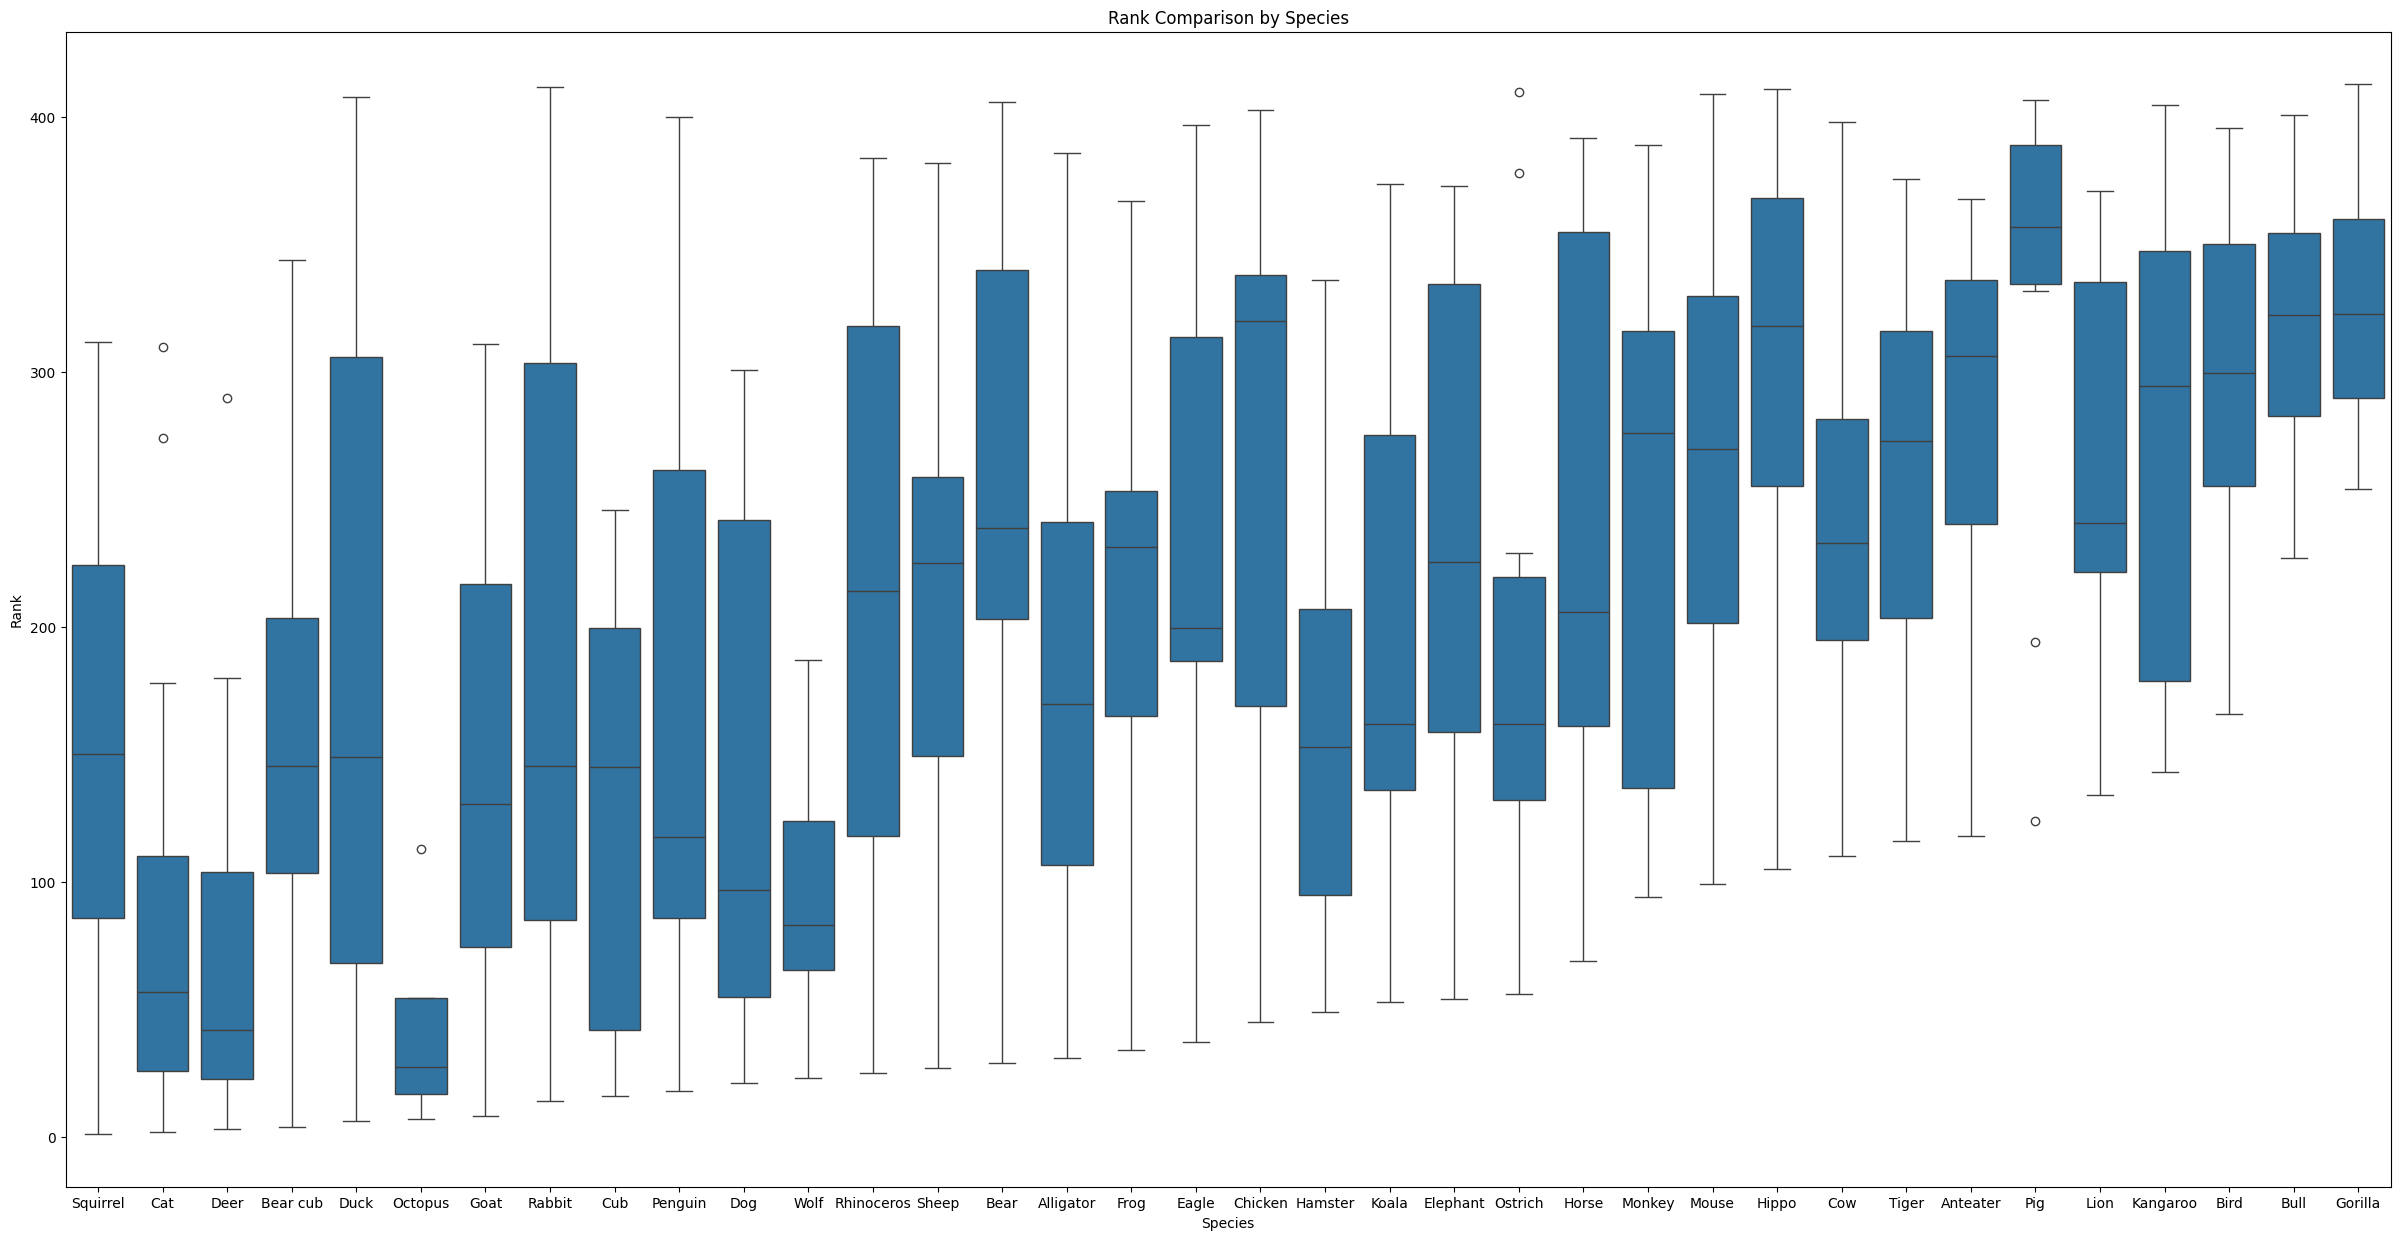

In [17]:
plt.figure(figsize=(30, 15))
ax = sns.boxplot(x='Species', y='Rank', data=data)
plt.title("Rank Comparison by Species")
plt.show()

/var/folders/2r/rd334g7d7gnfkfqkdqsn1x540000gn/T/ipykernel_78149/3208602294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Species', y='Rank', data=data, inner="box", palette='pastel')


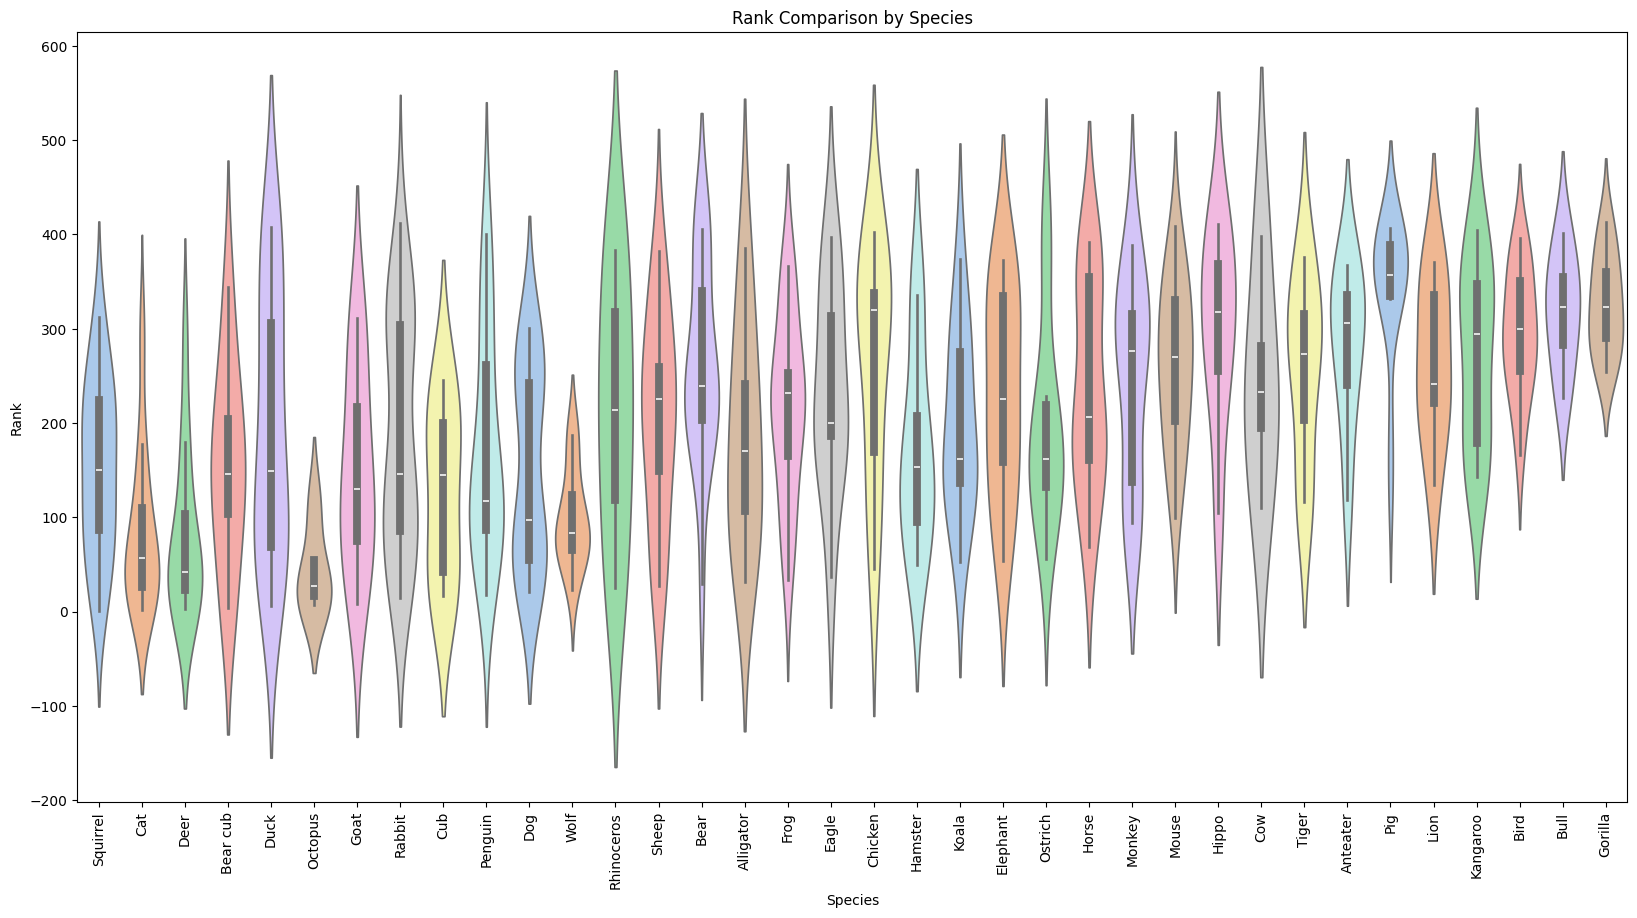

In [18]:
plt.figure(figsize=(20, 10))  # Adjust the figure size for better visibility

ax = sns.violinplot(x='Species', y='Rank', data=data, inner="box", palette='pastel')  
plt.title("Rank Comparison by Species")

plt.xticks(rotation=90)  # Rotate x-axis labels for readability if too many species
plt.show()

In [19]:
data['Tier'].value_counts()

Tier
Tier 6    163
Tier 5    120
Tier 4     60
Tier 3     30
Tier 2     25
Tier 1     15
Name: count, dtype: int64

<Axes: xlabel='Tier'>

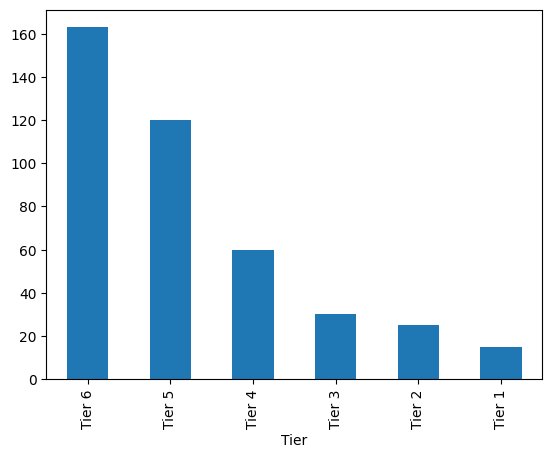

In [20]:
data['Tier'].value_counts().plot(kind='bar')

<Axes: xlabel='Rank', ylabel='Count'>

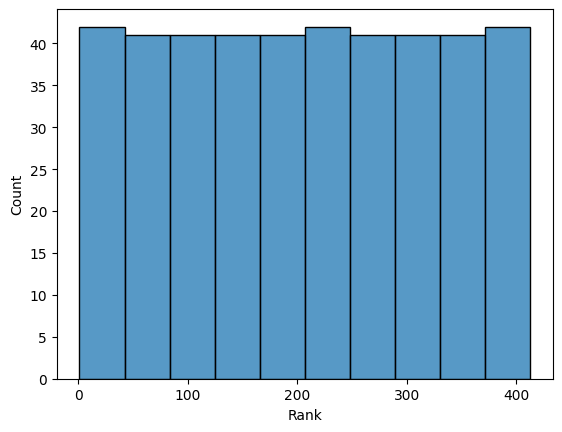

In [21]:
sns.histplot(data['Rank'])

### Gender

In [91]:
data['Gender'].value_counts(normalize=True)

Gender
Male      0.51816
Female    0.48184
Name: proportion, dtype: float64

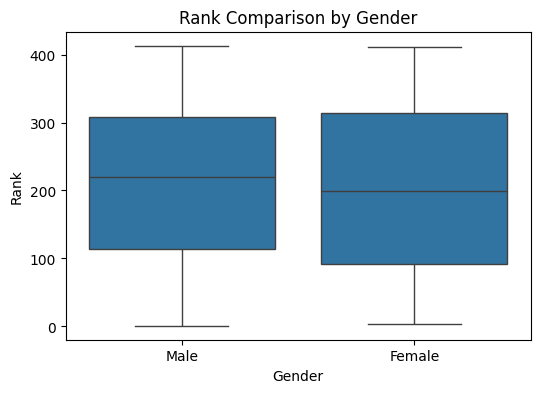

In [16]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Rank', data=data)
plt.title("Rank Comparison by Gender")
plt.show()

We have 6 tiers, 413 villagers (214 males, 199 females), 36 species, and 16 personalities.
It can be seen from the bar plots above that the tier is not random, judging by the non-uniformity of the counts. The same conclusion can be made for personality, gender, and species. Therefore, we can hypothesise that personality, gender, and species are the influencing factors for the tier (and the rank). The villagers birthdays, catchphrases, and names are considered trivial for their ranking.

In [17]:
from scipy.stats import mannwhitneyu

male_ranks = data[data['Gender'] == 'Male']['Rank']
female_ranks = data[data['Gender'] == 'Female']['Rank']

# Perform Mann-Whitney U test (Wilcoxon rank-sum test)
u_stat, p_value = mannwhitneyu(male_ranks, female_ranks, alternative='greater')

print(f"Mann-Whitney U Statistic: {u_stat:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Males have significantly higher ranks on average.")
else:
    print("No significant difference in rank between genders.")


Mann-Whitney U Statistic: 22360.00, p-value: 0.1895
No significant difference in rank between genders.


Males are generally ranked higher, as showned by their slightly higher median. Females have a more varied ranking (taller and wider box).
However, the Wilcoxon rank-sum test shows that this difference is not statistically significant (p-value > 0.05). Therefore, the bias in ranking does not seem to come from gender.

### Calculating occurence/rarity

In [106]:
personality_counts = data['Personality'].value_counts(normalize= True)
pers_median_ranks = data.groupby('Personality')['Rank'].median().sort_values(ascending=False)

In [103]:
Personality = pd.DataFrame()
Personality['Median Rank'] = pers_median_ranks
Personality['Normalised Count'] = personality_counts

In [102]:
species_counts = data['Species'].value_counts(normalize= True)
species_median_ranks = data.groupby('Species')['Rank'].median().sort_values(ascending=False)

In [25]:
Species = pd.DataFrame()
Species['Median Rank'] = species_median_ranks
Species['Normalised Count'] = species_counts

In [26]:
def set_thresholds(series):

    most_common_threshold = series.quantile(0.75)
    least_common_threshold = series.quantile(0.25)

    return most_common_threshold, least_common_threshold


def categorise_value(most_common_threshold, least_common_threshold, value):

    if value >= most_common_threshold:
        return 'Most common'
    elif value <= least_common_threshold:
        return 'Least common'
    else:
        return 'Average'

In [27]:
most_common_p, least_common_p = set_thresholds(Personality['Normalised Count'])
most_common_s, least_common_s = set_thresholds(Species['Normalised Count'])

In [28]:
Personality['Rarity'] = Personality['Normalised Count'].apply(
    lambda x: categorise_value(most_common_p, least_common_p, x)
)

Species['Rarity'] = Species['Normalised Count'].apply(
    lambda x: categorise_value(most_common_s, least_common_s, x)
)

In [29]:
Personality.sort_values(by= 'Normalised Count', ascending = False) 

,Median Rank,Normalised Count,Rarity
Personality,,,
Cranky (B),294.5,0.096852,Most common
Normal (B),169.0,0.096852,Most common
Snooty (B),310.0,0.094431,Most common
Peppy (B),191.5,0.092010,Most common
Lazy (B),165.0,0.089588,Average
Jock (B),223.5,0.087167,Average
Smug (A),222.0,0.075061,Average
Lazy (A),165.0,0.062954,Average
Normal (A),170.0,0.055690,Average


In [30]:
Species.sort_values(by= 'Normalised Count', ascending = False)

,Median Rank,Normalised Count,Rarity
Species,,,
Cat,57.0,0.055690,Most common
Rabbit,145.5,0.053269,Most common
Squirrel,150.0,0.046005,Most common
Frog,231.5,0.043584,Most common
Dog,97.0,0.041162,Most common
Duck,149.0,0.041162,Most common
Mouse,270.0,0.038741,Most common
Pig,357.0,0.036320,Most common
Bear,239.0,0.036320,Most common


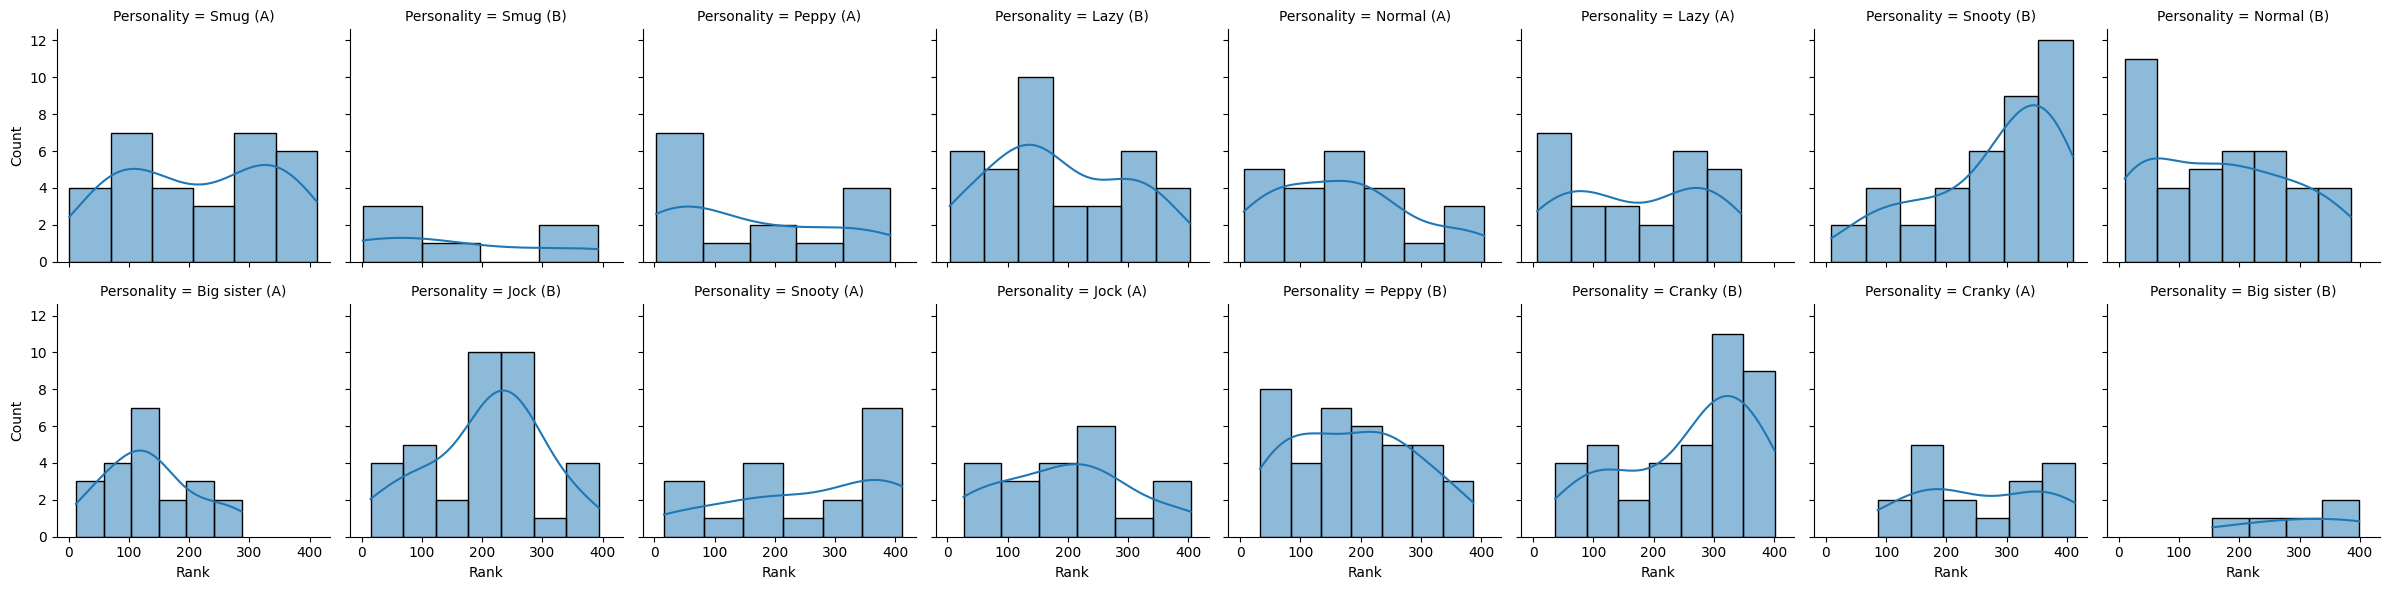

In [37]:
g = sns.FacetGrid(df_final, col="Personality", col_wrap = 8, height = 3, aspect= 1)
g.map(sns.histplot, "Rank", kde = True)


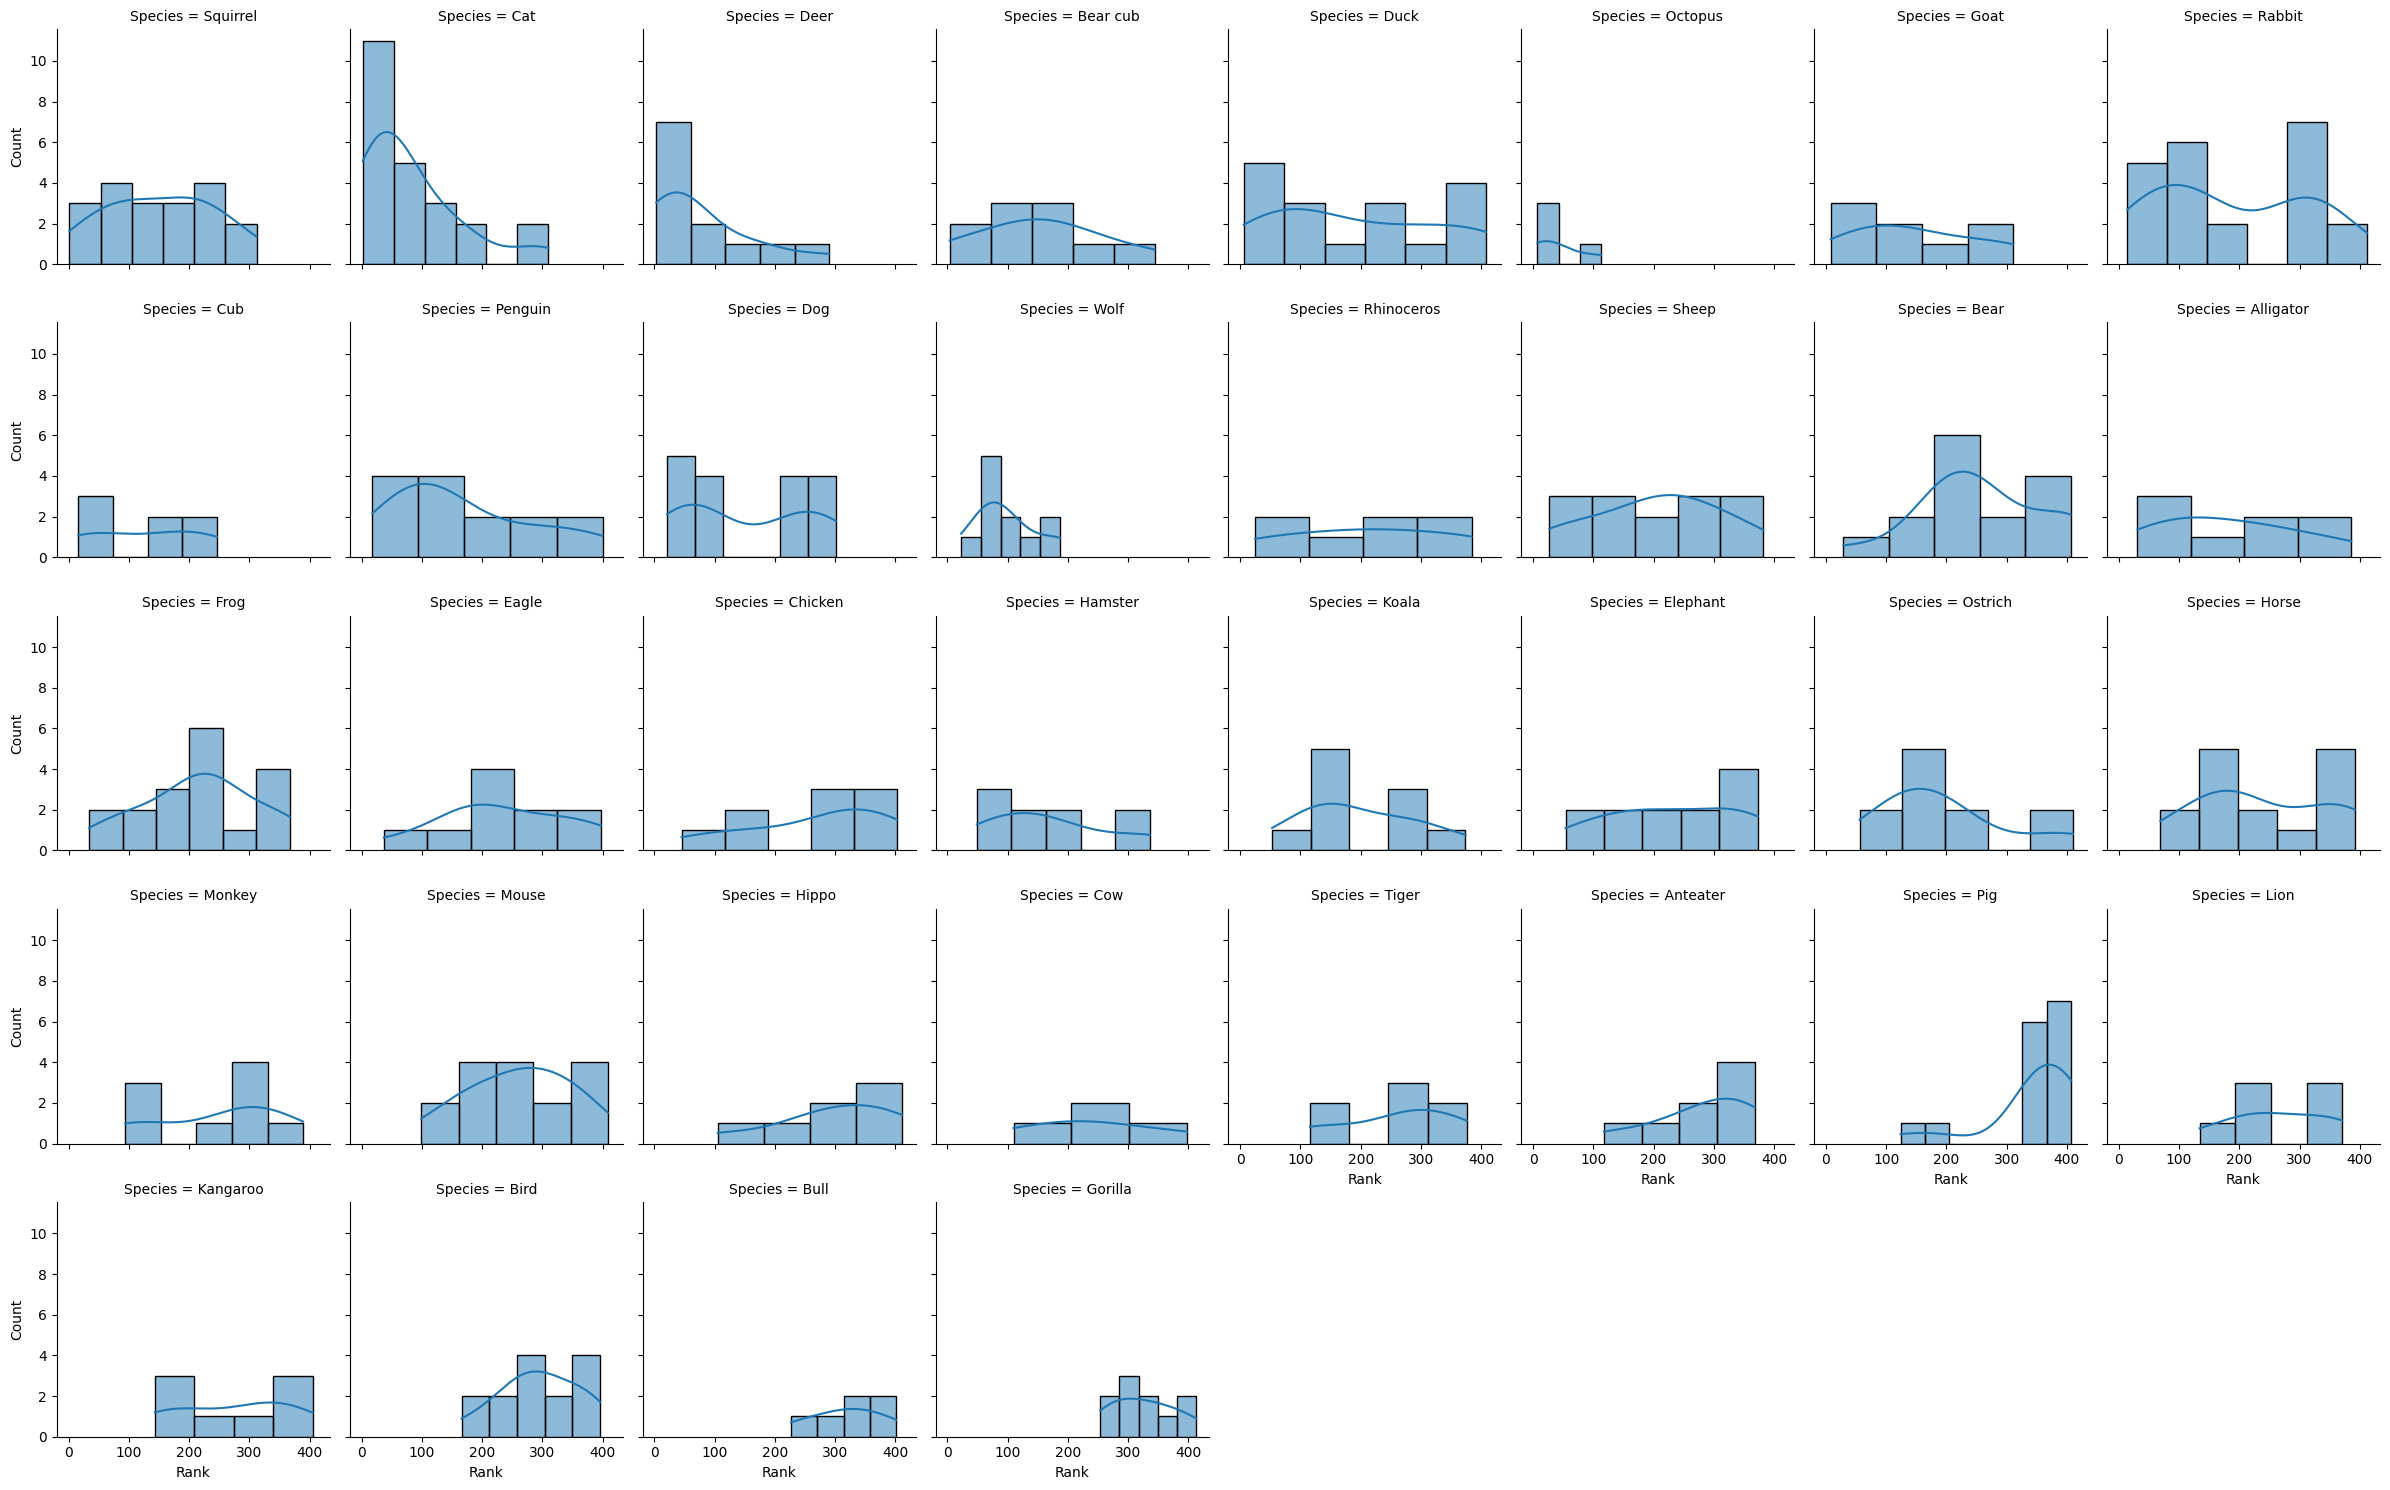

In [38]:
g = sns.FacetGrid(df_final, col="Species", col_wrap=8, height = 3, aspect = 1)
g.map(sns.histplot, "Rank", kde = True)

In [40]:
pd.set_option('display.max_rows', None)

data.groupby(['Species'])['Rank'].agg(['median', 'count']).sort_values(by = 'median')

,median,count
Species,,
Octopus,27.5,4
Deer,42.0,12
Cat,57.0,23
Wolf,83.0,11
Dog,97.0,17
Penguin,117.5,14
Goat,130.5,8
Cub,145.0,7
Rabbit,145.5,22


## Early conclusions

### Appearance

The most popular characters i.e. those in Tier 1, seem to have soft, small and roundish features, as is the case for cats, deers, octopuses...  and adorned with pastel colours. These are commonly associated with cuteness in predominant/ major cultures and reflected in the media. 
It can't be helped but noticed that these are often associated with cuteness through the lens of neoteny and kawaii culture, which have been widely embraced and reinforced by dominant media. While this aesthetic may appear universal, it reflects a specific cultural perspective that shapes mainstream standards of beauty and excludes features that fall outside its narrow ideal, and now seeps though, seemingly inoffensively, in video games.
A look at the less popular villagers reinforce this bias hypithesis as they appear to have bigger physical features, encountered in species such as hippos, pigs, bulls, gorillas or cows. Their design often have gritty or earthy colours.

Some characters also appear to be popular due to unique features that set them apart. Raymond for example has heterochromia, Kid Cat sports a superhero-like mask, Ankha embodies an ancient Egyptian princess, and Stitches looks like a patchwork teddy bear. This is interesting as it reflects how scarcity and exclusivity can drive preferences, much like in fashion, collectibles, and social dynamics in real life. However, just like in the real world, trends, i.e. movements outside the established aesthetic ideal, are unpredictable. Some once-beloved characters fade from favor, while others, maintain their status. For instance, **Kid Cat** dropped from **14th to 59th place** in a more recent ranking, whereas **Raymond, Ankha, and Stitches** have consistently remained in Tier 1.

The villagers that fall into the middle tier often have duller, more unremarkable designs. Much like in society, these characters tend to go unnoticed, with few people forming strong opinions about them, whether positive or negative. They exist in a kind of neutral space.

In [109]:
#Adding villager covers to have a better grasp

images_df = pd.read_pickle('images_df.pkl')
del[images_df['Image path']]
df_final = pd.merge(data, images_df, how='left', left_on=['Name'], right_on=['Name'])

#Looking at the Tier 1 table only
HTML(df_final.head(15).to_html(escape=False))

,Name,Rank,Tier,Species,Gender,Personality,Birthday,Catchphrase,Image
0,Marshal,1,Tier 1,Squirrel,Male,Smug (A),September 29,sulky,
1,Raymond,2,Tier 1,Cat,Male,Smug (B),October 1,crisp,
2,Shino,3,Tier 1,Deer,Female,Peppy (A),October 31,okaaay,
3,Stitches,4,Tier 1,Bear cub,Male,Lazy (B),February 10,stuffin',
4,Bob,5,Tier 1,Cat,Male,Lazy (B),January 1,pthhpth,
5,Molly,6,Tier 1,Duck,Female,Normal (A),March 7,quackidee,
6,Zucker,7,Tier 1,Octopus,Male,Lazy (A),March 8,bloop,
7,Sherb,8,Tier 1,Goat,Male,Lazy (A),January 18,bawwww,
8,Ankha,9,Tier 1,Cat,Female,Snooty (B),September 22,me meow,
9,Lolly,10,Tier 1,Cat,Female,Normal (B),March 27,bonbon,


In [44]:
HTML(df_final.tail(15).to_html(escape=False))

,Name,Rank,Tier,Species,Gender,Personality,Birthday,Catchphrase,Image
398,Paula,399,Tier 6,Bear,Female,Big sister (B),March 22,yodelay,
399,Gwen,400,Tier 6,Penguin,Female,Snooty (B),January 23,h-h-h-hon,
400,T-Bone,401,Tier 6,Bull,Male,Cranky (B),May 20,moocher,
401,Mallary,402,Tier 6,Duck,Female,Snooty (B),November 17,quackpth,
402,Benedict,403,Tier 6,Chicken,Male,Lazy (B),October 10,uh-hoo,
403,Kevin,404,Tier 6,Pig,Male,Jock (A),April 26,weeweewee,
404,Carrie,405,Tier 6,Kangaroo,Female,Normal (A),December 5,little one,
405,Ike,406,Tier 6,Bear,Male,Cranky (A),May 16,roadie,
406,Chops,407,Tier 6,Pig,Male,Smug (A),October 13,zoink,
407,Gloria,408,Tier 6,Duck,Female,Snooty (B),August 12,quacker,


<Axes: xlabel='Species'>

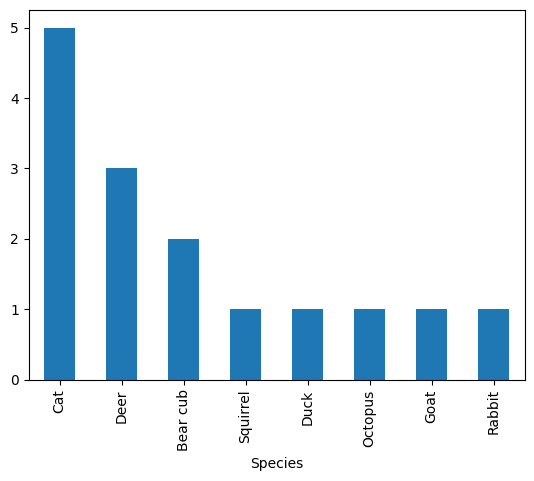

In [45]:
df_final['Species'].head(15).value_counts().plot(kind='bar')

<Axes: xlabel='Species'>

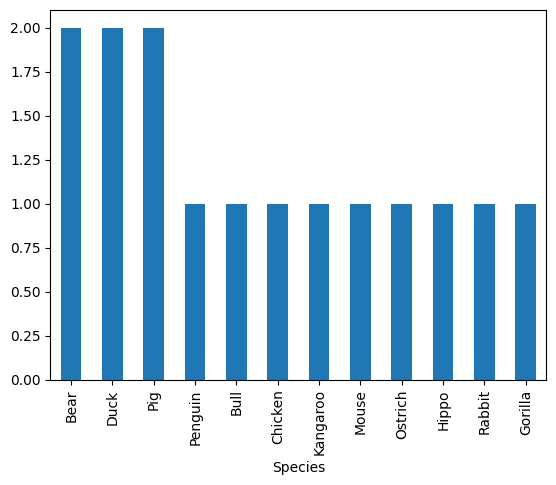

In [46]:
df_final['Species'].tail(15).value_counts().plot(kind='bar')

### Personality

On average, the best ranked villagers have a Smug (B) , Peppy (A), Big sister (A), Lazy (A) or Lazy (B) personality type. A median rank by species and personnality was used instead of a mean rank to reduce sensitivity to outliers. It can be noticed that in the top 20, these personality types only have 1 villager each. The most predominant category in that top 20 is Normal (B), which is not a popular personality type, but it remains the most common one. Therefore, let's analyse the discrepancies encountered.

Ankha is at top 9 even though her personality is snooty B which is the most unpopular personality type. It is however also one of the most common ones. On the contrary, Shino has an uncommon but popular personality type (peppy A) and is at top 3.
Judy is at top 16 even tho her personality is snooty A which is uncommon *and* unpopular.

These observations from the top 20 most popular villagers show that the personality types with the best median ranks do not indicate a clear and general pattern in the user definite preferences.

<Axes: xlabel='Personality'>

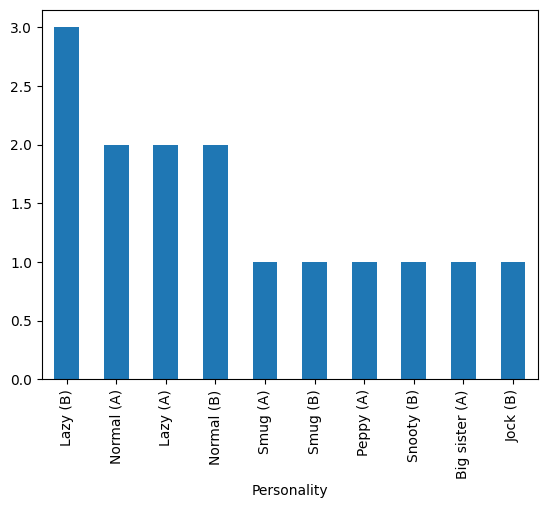

In [47]:
df_final['Personality'].head(15).value_cunts().plot(kind='bar')

<Axes: xlabel='Personality'>

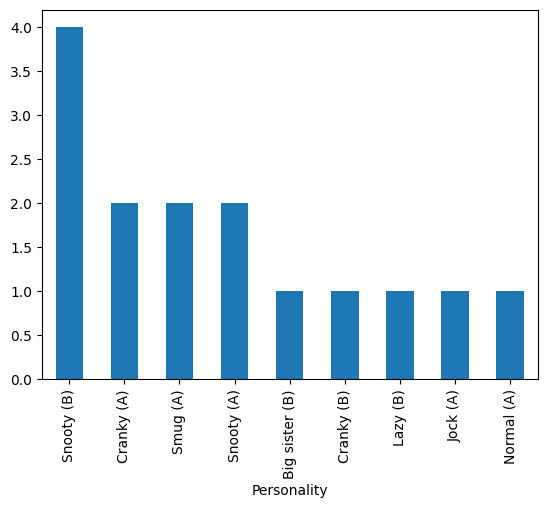

In [48]:
df_final['Personality'].tail(15).value_counts().plot(kind='bar')

## Earlyyy conclusions


Out of the 8 different species present in the top 15, 4 are part of the most common: cats, rabbits, ducks, and squirrels; and 2 are part of the least common: octopuses and goats. In the last 15, out of the 12 different species present, 5 are part of the most common: bears, ducks, pigs, mice, rabbits; and 3 are part of the least common: kangaroos, hippos, and goats. The ratios are slightly similar in both groups. The representation of a villager therefore does not seem to impact their popularity in one way or another.

For the 10 different personality types present in the top 15, 2 are in the most common: Snooty (B) and Normal (B) and 2 are in the least common, Peppy (A) and Smug (B). Similarly, in the last 15, out of the 9 different species present, 2 are in the most common: Snooty (B) and Cranky (B); and in the least common: Cranky (A) and Big sister (B).

This shows that our observations about the most and least popular villagers are not influenced by species or personality types representation.


Comparing the species from the top 15 (Tier 1) villagers with the last 15 (belonging to Tier 6), we can see that only 2 appear in both sets: ducks and rabbits.

In terms of personality types, 4 personality types appear in both the top 15 (Tier 1) and the last 15 (belonging to Tier 6) sets: {'Lazy (B)', 'Normal (A)', 'Smug (A)', 'Snooty (B)'}. This is almost 1/3 of the set.

Species tend to be more polarised in terms of ranking than personality types. This could confirm our hypothesis about appearance bias. Some species particularly, and therefore certain looks, tend to be more popular among users.

In [49]:
#Comparing species in the top and last 15

head_sp = set(df_final['Species'].tail(15).unique())

tail_sp = set(df_final['Species'].head(15).unique())

head_sp & tail_sp

{'Duck', 'Rabbit'}

In [50]:
#Comparing personality types in the top and last 15

head_pt = set(df_final['Personality'].tail(15).unique())

tail_pt = set(df_final['Personality'].head(15).unique())

head_pt & tail_pt

{'Lazy (B)', 'Normal (A)', 'Smug (A)', 'Snooty (B)'}

## Bias study: correlation between different features and their significance

#### Couldn't use ANOVA, not normal + small sample size

In [51]:
#Shapiro Wilk test the likeliness of the data being normal (and therefore random)

personality_types = data['Personality'].unique()

for personality in personality_types:
    dataa = data.loc[data['Personality'] == personality, ['Rank']]
    stat, p_value = stats.shapiro(dataa)
    print(f"Shapiro-Wilk test statistic {personality}: {stat:.3f}, p-value: {p_value:.3f}")

Shapiro-Wilk test statistic Smug (A): 0.931, p-value: 0.045
Shapiro-Wilk test statistic Smug (B): 0.849, p-value: 0.154
Shapiro-Wilk test statistic Peppy (A): 0.872, p-value: 0.036
Shapiro-Wilk test statistic Lazy (B): 0.953, p-value: 0.120
Shapiro-Wilk test statistic Normal (A): 0.941, p-value: 0.188
Shapiro-Wilk test statistic Lazy (A): 0.918, p-value: 0.041
Shapiro-Wilk test statistic Snooty (B): 0.902, p-value: 0.003
Shapiro-Wilk test statistic Normal (B): 0.932, p-value: 0.019
Shapiro-Wilk test statistic Big sister (A): 0.957, p-value: 0.459
Shapiro-Wilk test statistic Jock (B): 0.969, p-value: 0.394
Shapiro-Wilk test statistic Snooty (A): 0.885, p-value: 0.032
Shapiro-Wilk test statistic Jock (A): 0.955, p-value: 0.415
Shapiro-Wilk test statistic Peppy (B): 0.956, p-value: 0.139
Shapiro-Wilk test statistic Cranky (B): 0.914, p-value: 0.005
Shapiro-Wilk test statistic Cranky (A): 0.925, p-value: 0.177
Shapiro-Wilk test statistic Big sister (B): 0.914, p-value: 0.491


In [75]:
p_values_dict = {}

# Define the Kruskal-Wallis test with Dunn's post-hoc
def kruskal_epsilon_dunn(data, cat_col, num_col):
    # Kruskal-Wallis test with Epsilon squared effect size
    groups = [group[num_col].values for _, group in data.groupby(cat_col)]
    h_stat, p_val = kruskal(*groups)

    k= len(groups)
    N= len(data)
    epsilon_squared = (h_stat - (k - 1)) / (N - k)
    print(f"\n{cat_col} - Kruskal-Wallis H: {h_stat:.2f}, p = {p_val:.4f}, ε² ≈ {epsilon_squared:.2f}")

    # Post-hoc Dunn's test (only if Kruskal is significant)
    if p_val < 0.05:
        print("Significant! Running Dunn's post-hoc test...")
        dunn = spost.posthoc_dunn(data, val_col=num_col, group_col=cat_col, p_adjust='bonferroni')
        print("\nDunn’s Test (p-values):")
        print(dunn)
        return dunn
    else:
        print("Not significant. Skipping post-hoc test.")
        return None

# Run Kruskal-Wallis and Dunn's test for each categorical column
for col in ['Personality', 'Species', 'Gender']:
    dunn_results = kruskal_epsilon_dunn(data, col, 'Rank')
    if dunn_results is not None:
        p_values_dict[col] = dunn_results



Personality - Kruskal-Wallis H: 49.91, p = 0.0000, ε² ≈ 0.09
Significant! Running Dunn's post-hoc test...

Dunn’s Test (p-values):
                Big sister (A)  Big sister (B)  Cranky (A)  Cranky (B)  \
Big sister (A)        1.000000        0.701737    0.238475    0.017244   
Big sister (B)        0.701737        1.000000    1.000000    1.000000   
Cranky (A)            0.238475        1.000000    1.000000    1.000000   
Cranky (B)            0.017244        1.000000    1.000000    1.000000   
Jock (A)              1.000000        1.000000    1.000000    1.000000   
Jock (B)              1.000000        1.000000    1.000000    1.000000   
Lazy (A)              1.000000        1.000000    1.000000    0.594490   
Lazy (B)              1.000000        1.000000    1.000000    0.809265   
Normal (A)            1.000000        1.000000    1.000000    0.663663   
Normal (B)            1.000000        1.000000    1.000000    0.138426   
Peppy (A)             1.000000        1.000000    1.00

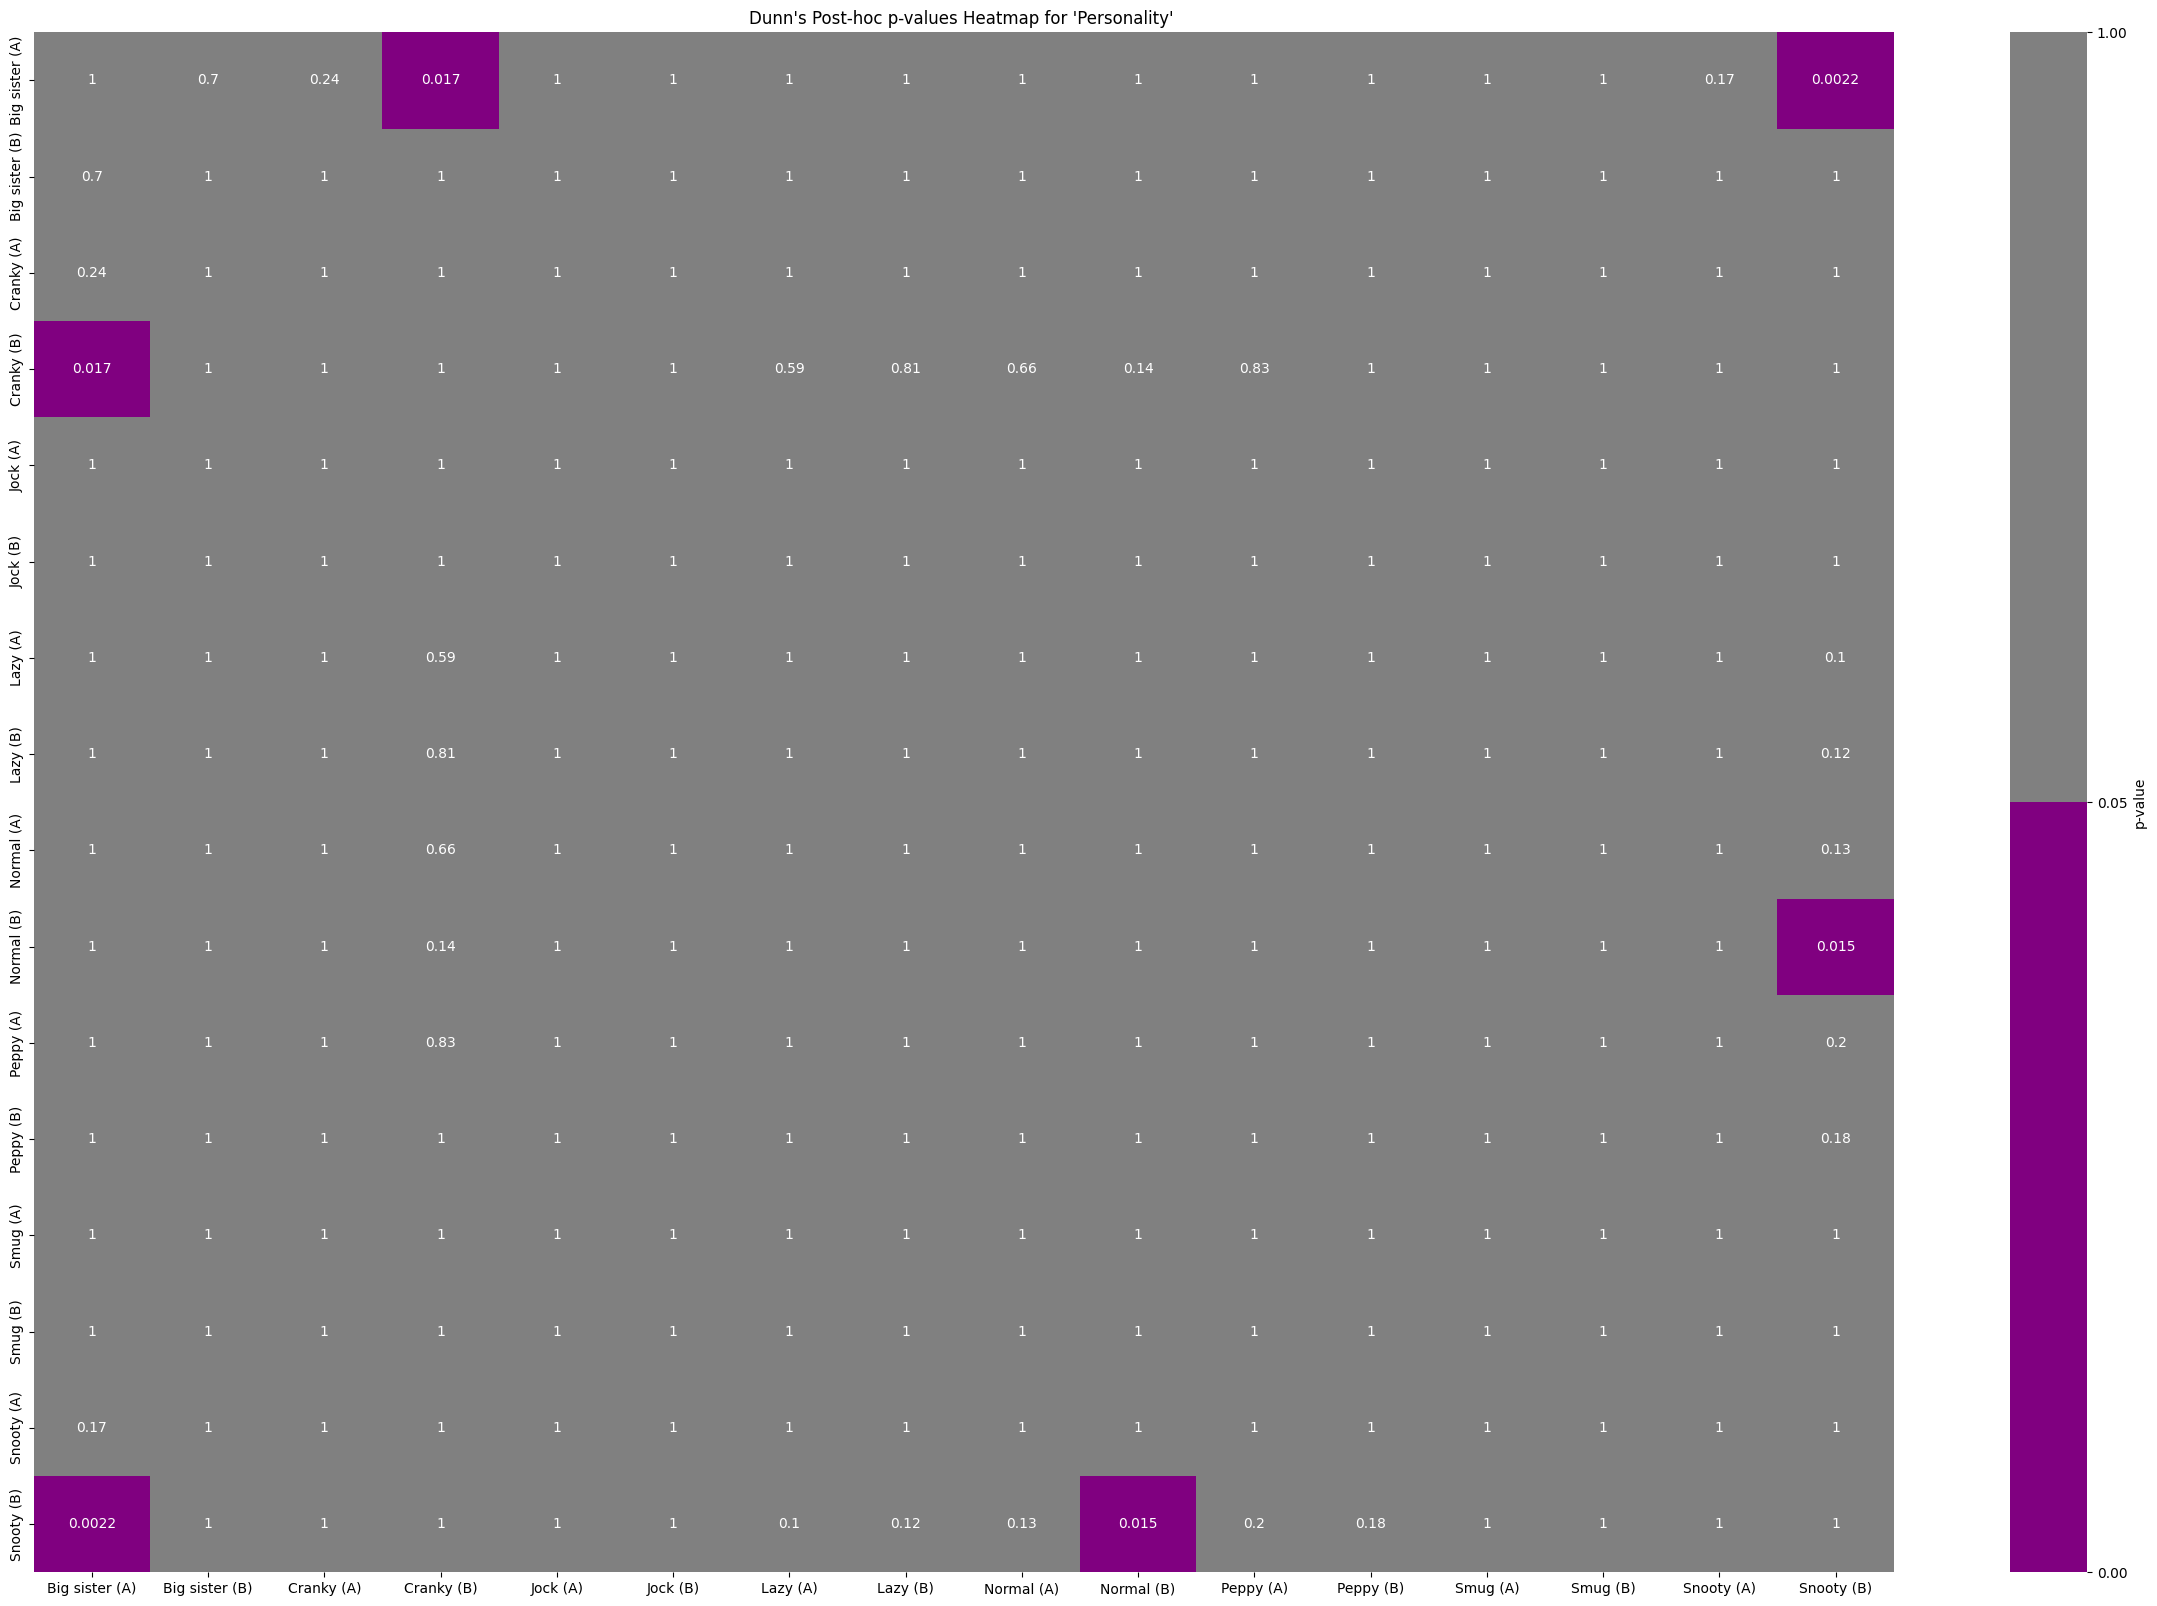

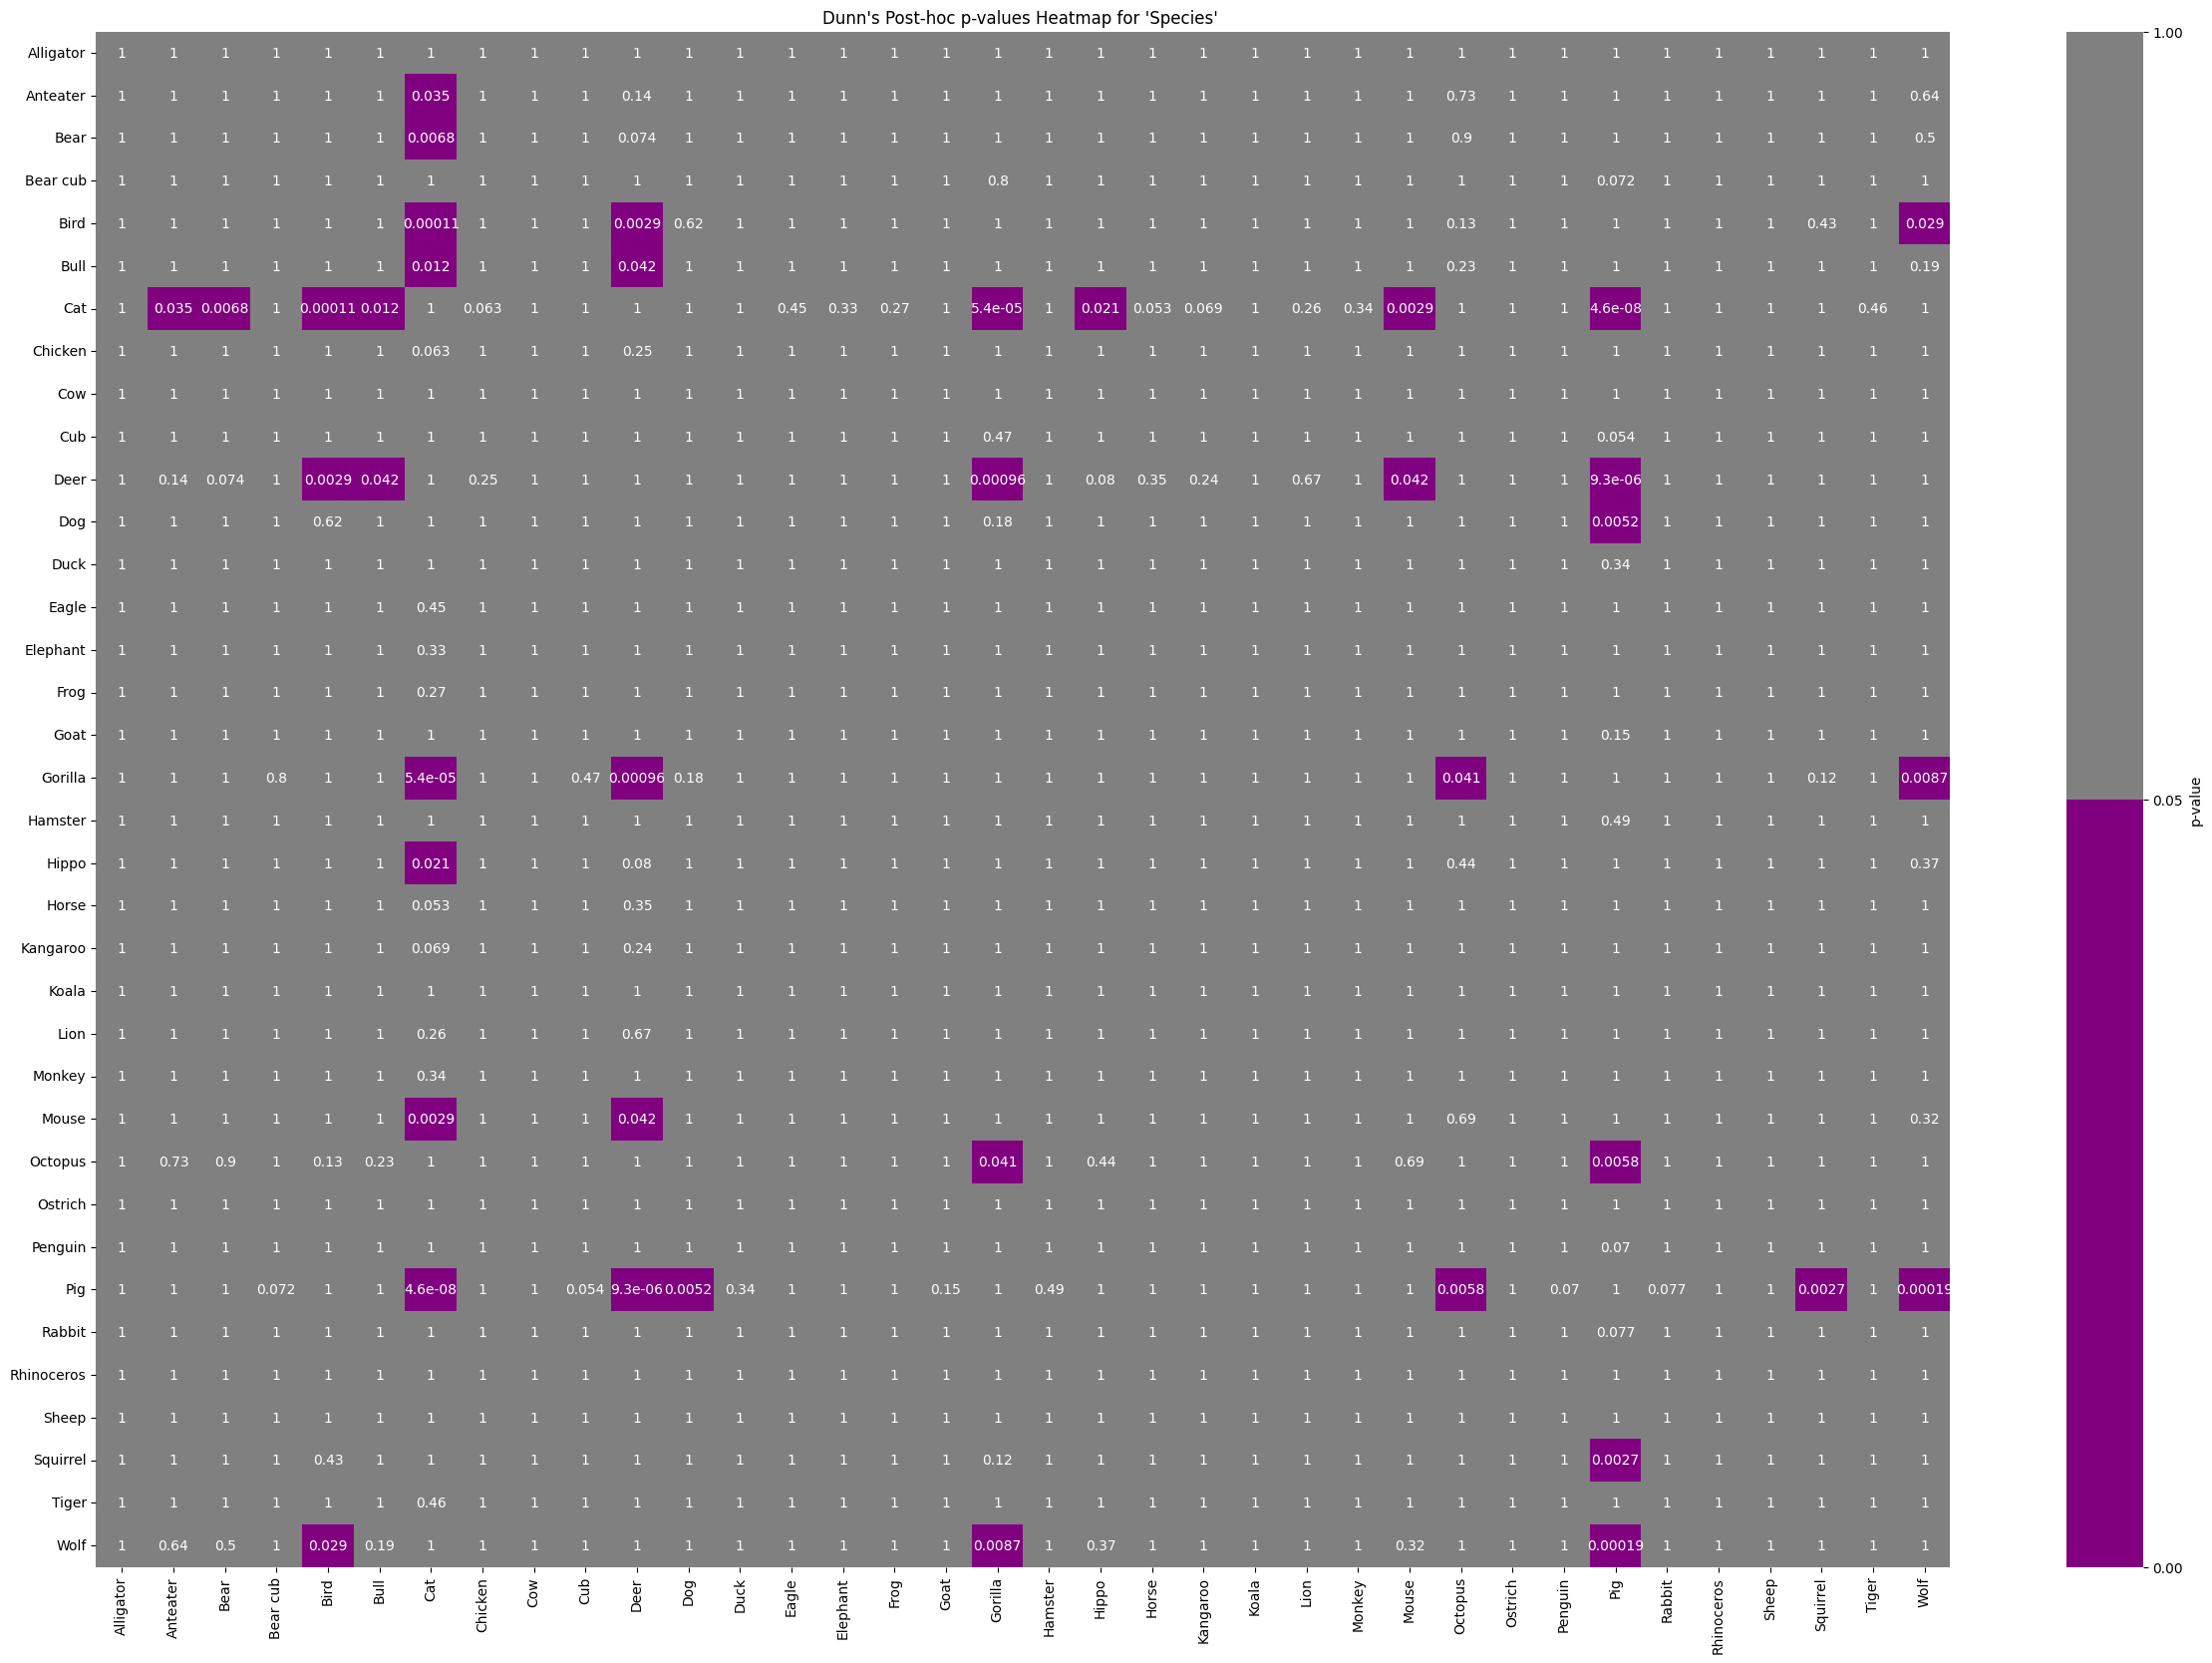

In [58]:
colors = ['purple', 'gray']
cmap = ListedColormap(colors)

boundaries = [0, 0.05, 1.0]
norm = BoundaryNorm(boundaries, ncolors=cmap.N)

for key, value in p_values_dict.items():
    plt.figure(figsize=(30, 20))
    sns.heatmap(value, annot=True, cmap=cmap, norm =norm, vmin= 0, vmax=1, cbar_kws={'label': 'p-value'})
    plt.title(f"Dunn\'s Post-hoc p-values Heatmap for '{key}' ")
    plt.show()


Interpretation:
If the p-value is low (< 0.05), it suggests that the feature is significantly related to the villager's tier.
If the p-value is high, the feature may not be contributing much to the tier prediction.

Interpretation:
If the p-value is low (< 0.05), it suggests that the feature is significantly related to the villager's tier.
If the p-value is high, the feature may not be contributing much to the tier prediction.